In [2]:
import os
from sys import getsizeof
import time
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# for auto reload a module after editing.
%load_ext autoreload
%autoreload 2

In [88]:
DATA_DIR  = os.path.join('.', 'input')
TRAIN_PATH = os.path.join(DATA_DIR, 'train.csv')
TEST_PATH = os.path.join(DATA_DIR, 'test.csv')
TRAIN_LABEL_PATH = os.path.join(DATA_DIR, 'train_labels.csv')
TEST_LABEL_PATH = os.path.join(DATA_DIR, 'test_labels.csv')

In [29]:
train_label_df = pd.read_csv(TRAIN_LABEL_PATH)
assessment_list = train_label_df['title'].unique()
print('total_count:', train_label_df.shape[0])
print('user_count:', train_label_df['installation_id'].nunique())
print(assessment_list)

total_count: 17690
user_count: 3614
['Mushroom Sorter (Assessment)' 'Bird Measurer (Assessment)'
 'Cauldron Filler (Assessment)' 'Chest Sorter (Assessment)'
 'Cart Balancer (Assessment)']


In [42]:
def plot_label_distribution(df):
    """
    subplot_0: distribution of 'num_incorrect',
    subplot_1: distribution of 'accuracy_group'.
    subplot_2: distribution of user's best 'num_incorrect' (one user may do multiple trials).
    subplot_3: distribution of user's best 'accuracy_group' (one user may do multiple trials).
    """
    label_title = df['title'].iloc[0]
    total_count = df.shape[0]
    user_count = df['installation_id'].nunique()
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    fig.suptitle('{}: total_count={}, user_count={}'.format(label_title, total_count, user_count))

    ax[0].hist(df['num_incorrect'])
    ax[0].set_xlabel('num_incorrect')
    ax[0].set_ylabel('Count')
    ax[1].hist(df['accuracy_group'])
    ax[1].set_xlabel('accuracy_group')
    ax[1].set_ylabel('Count')    
    
    df_gb = df.groupby(['installation_id']).agg({
        'num_correct': 'max',
        'num_incorrect': 'min',
        'accuracy_group': 'max'
    })
    ax[2].hist(df_gb['num_incorrect'])
    ax[2].set_xlabel('best num_incorrect')
    ax[2].set_ylabel('Count')    
    ax[3].hist(df_gb['accuracy_group'])
    ax[3].set_xlabel('best accuracy_group')
    ax[3].set_ylabel('Count')
#     plt.tight_layout()
    plt.show()

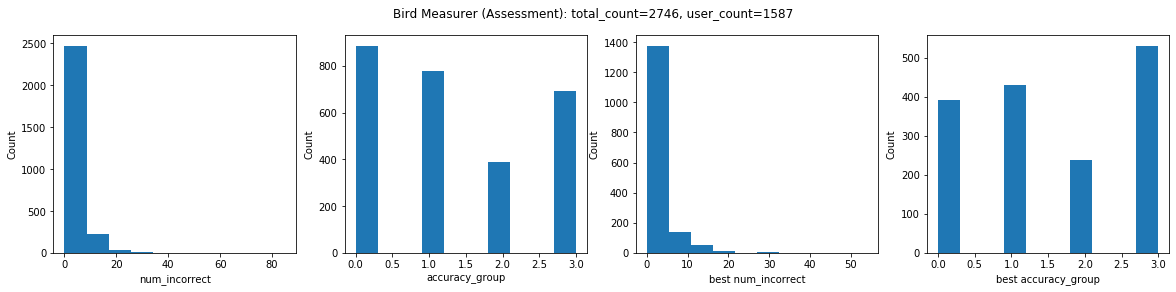

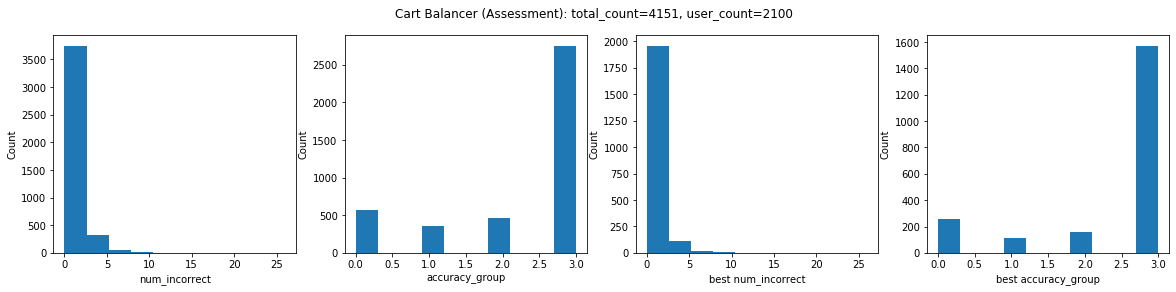

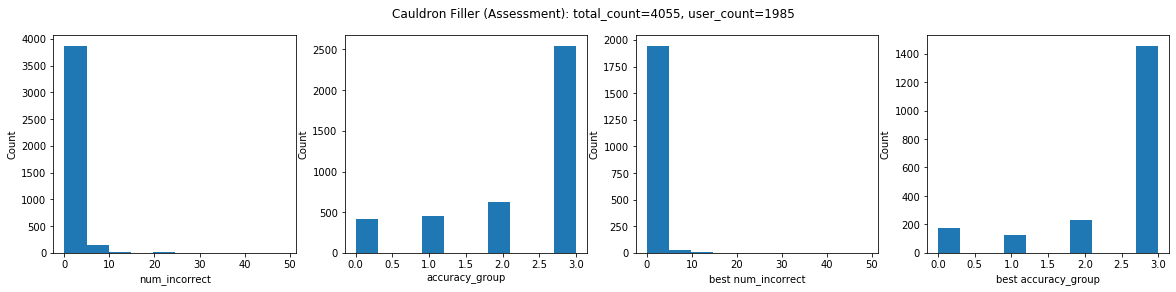

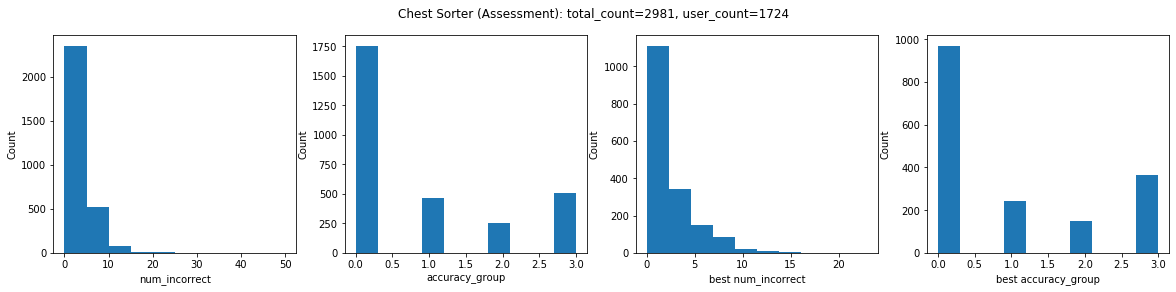

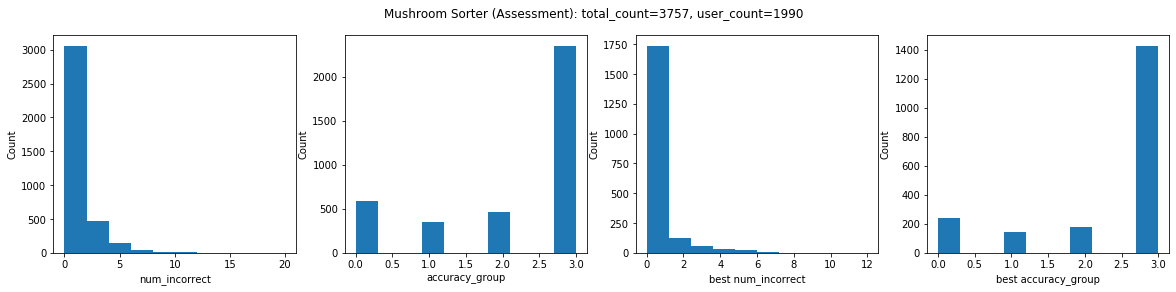

In [75]:
train_label_df_assBS = train_label_df[train_label_df['title'] == assessment_list[1]]
train_label_df_assCB = train_label_df[train_label_df['title'] == assessment_list[4]]
train_label_df_assCF = train_label_df[train_label_df['title'] == assessment_list[2]]
train_label_df_assCS = train_label_df[train_label_df['title'] == assessment_list[3]]
train_label_df_assMS = train_label_df[train_label_df['title'] == assessment_list[0]]

plot_label_distribution(train_label_df_assBS)
plot_label_distribution(train_label_df_assCB)
plot_label_distribution(train_label_df_assCF)
plot_label_distribution(train_label_df_assCS)
plot_label_distribution(train_label_df_assMS)

In [74]:
train_label_df_unstack = train_label_df.groupby(['installation_id', 'title']).agg({
                                'accuracy_group': 'max'
                            }).unstack(level=1)
print(train_label_df_unstack.columns.values)

[('accuracy_group', 'Bird Measurer (Assessment)')
 ('accuracy_group', 'Cart Balancer (Assessment)')
 ('accuracy_group', 'Cauldron Filler (Assessment)')
 ('accuracy_group', 'Chest Sorter (Assessment)')
 ('accuracy_group', 'Mushroom Sorter (Assessment)')]


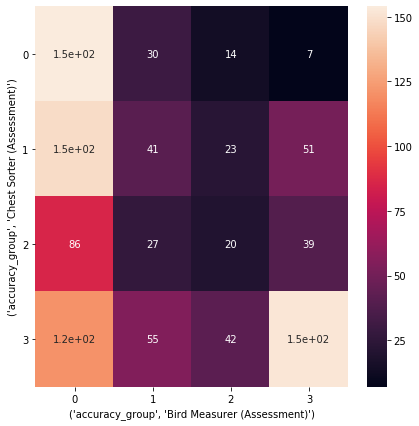

In [79]:
i = 0
j = 3
temp = train_label_df_unstack.iloc[:, [i, j]].dropna(axis=0)
x = temp.iloc[:, 0]
y = temp.iloc[:, 1]

cm = confusion_matrix(x, y, np.arange(4))
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True)
plt.xlabel(train_label_df_unstack.columns.values[i])
plt.ylabel(train_label_df_unstack.columns.values[j])
plt.xticks(np.arange(4) + 0.5, np.arange(4), rotation=0)
plt.yticks(np.arange(4) + 0.5, np.arange(4), rotation=0)
plt.ioff()

In [89]:
test_label_df = pd.read_csv(TEST_LABEL_PATH).dropna()
print('total_count:', test_label_df.shape[0])
print('user_count:', test_label_df['installation_id'].nunique())

total_count: 2018
user_count: 557


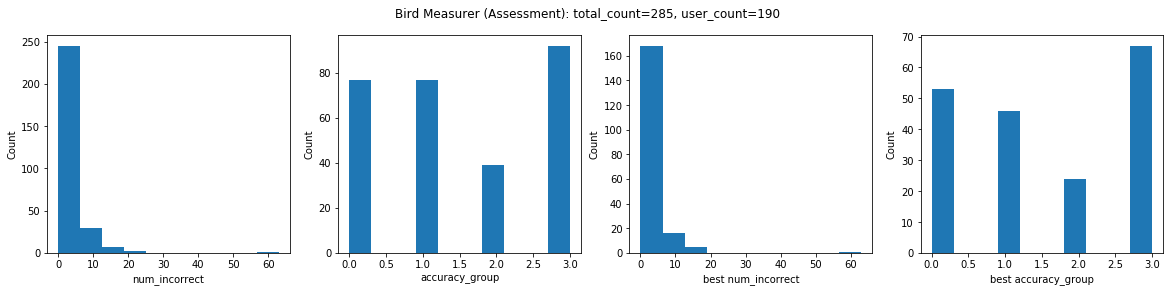

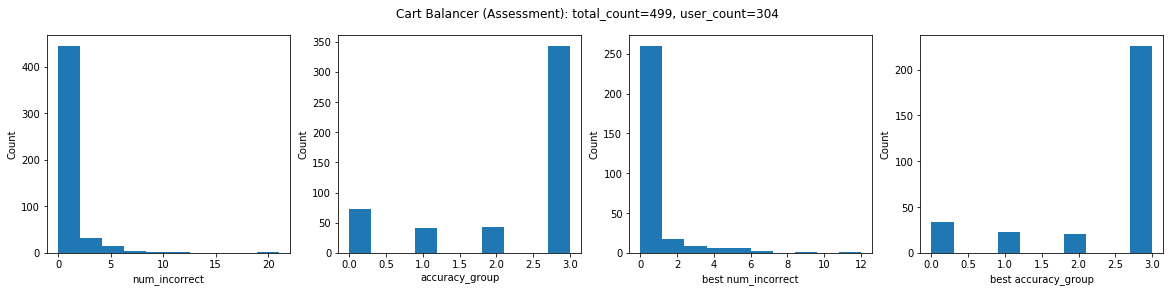

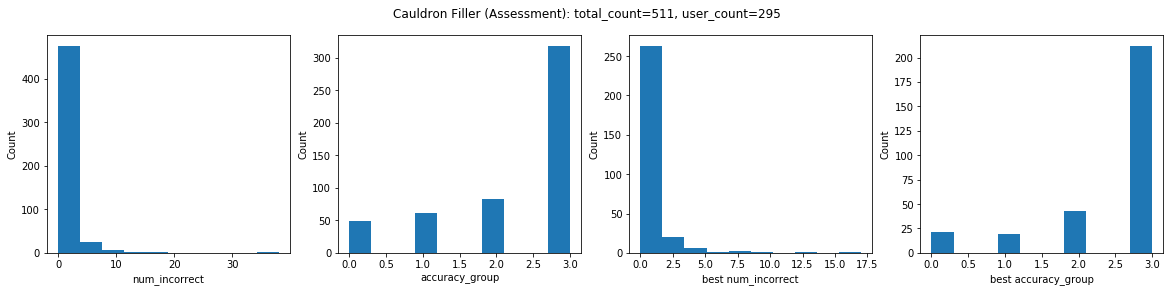

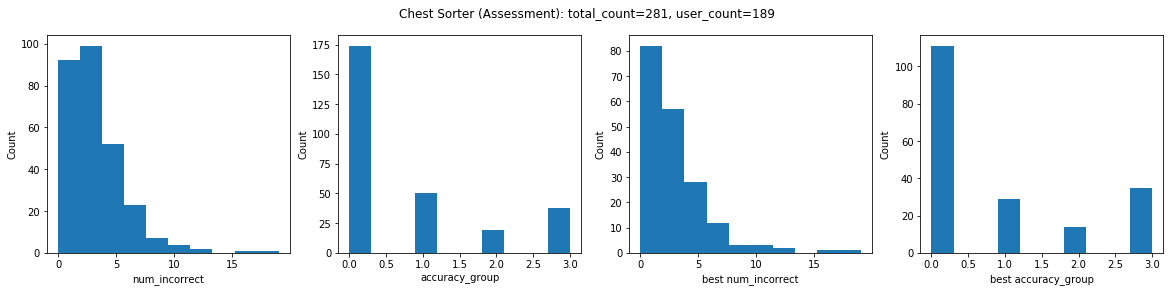

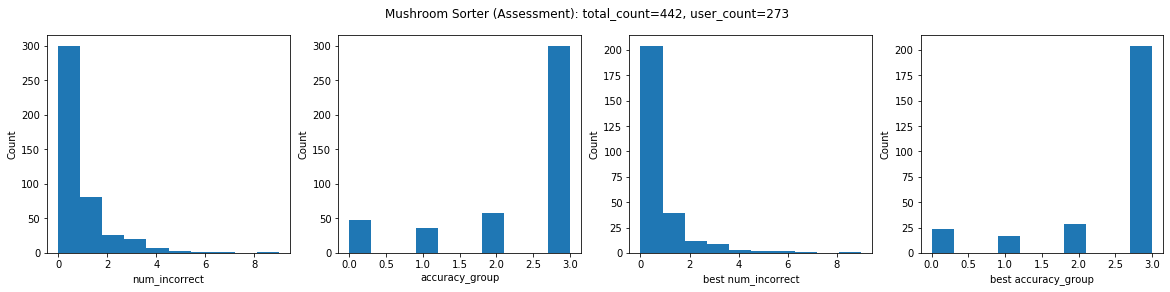

In [90]:
test_label_df_assBS = test_label_df[test_label_df['title'] == assessment_list[1]]
test_label_df_assCB = test_label_df[test_label_df['title'] == assessment_list[4]]
test_label_df_assCF = test_label_df[test_label_df['title'] == assessment_list[2]]
test_label_df_assCS = test_label_df[test_label_df['title'] == assessment_list[3]]
test_label_df_assMS = test_label_df[test_label_df['title'] == assessment_list[0]]

plot_label_distribution(test_label_df_assBS)
plot_label_distribution(test_label_df_assCB)
plot_label_distribution(test_label_df_assCF)
plot_label_distribution(test_label_df_assCS)
plot_label_distribution(test_label_df_assMS)